<div style="border:solid Chocolate 2px; padding: 40px">
Денис, привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">

Проделана хорошая работа. Код написан чисто, соблюдена структура проекта и написаны выводы. Есть несколько замечаний, исправь их и проект будет принят.

- по ссылкам ниже ты найдешь интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- проверь, пожалуйста, отсутствие пересечения пользователей    
- добавь, пожалуйста, расчет доли пользователей от первого шага до оплаты
- проанализируй и используй, пожалуйста, поправку на множественную проверку гипотез   
- добавь, пожалуйста, формулировку гипотез
</div>
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту в2

<div class="alert alert-success">

Отлично, замечания имправлены корректно, единственное хочу обратить внимание, что поправк расчитана не корректно, вместо 1 необходимо использовтаь общее число проверок - 17

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b>

Для того, чтобы сразу понять, о чем проект, в начале лучше добавить:
    
- краткое описание проекта;

- описание данных;

- план работы;

- цель проекта;
    
- заголовок.

</div>


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
logs_exp = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
logs_exp['EventTimestamp'] = logs_exp['EventTimestamp'].astype('datetime64[s]')

In [4]:
logs_exp.describe()

,DeviceIDHash,ExpId
count,2.441260e+05,244126.000000
mean,4.627568e+18,247.022296
std,2.642425e+18,0.824434
min,6.888747e+15,246.000000
25%,2.372212e+18,246.000000
50%,4.623192e+18,247.000000
75%,6.932517e+18,248.000000
max,9.222603e+18,248.000000


In [5]:
logs_exp.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

In [6]:
logs_exp.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,246
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,246
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,246


In [7]:
logs_exp = logs_exp.rename(columns = {'EventName': 'event_name', 'DeviceIDHash': 'device_id_hash', 'EventTimestamp': 'event_timestamp', 'ExpId': 'exp_id'})

In [8]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


In [9]:
pd.DataFrame(round(logs_exp.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
event_name,0.000000
device_id_hash,0.000000
event_timestamp,0.000000
exp_id,0.000000


In [10]:
logs_exp.duplicated().sum()

413

In [11]:
logs_exp.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
244121    False
244122    False
244123    False
244124    False
244125    False
Length: 244126, dtype: bool

In [12]:
logs_exp[logs_exp.duplicated()]

,event_name,device_id_hash,event_timestamp,exp_id
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248
...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,2019-08-07 19:26:44,247
242332,PaymentScreenSuccessful,4718002964983105693,2019-08-07 19:26:45,247
242360,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246
242362,CartScreenAppear,2382591782303281935,2019-08-07 19:27:29,246


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 
    
Для понимания того, какую часть составляют дубликаты и какой объем ты удаляешь, лучше дополнительно посчитать долю.
 </div>


In [13]:
logs_exp = logs_exp.drop_duplicates()

In [14]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   device_id_hash   243713 non-null  int64         
 2   event_timestamp  243713 non-null  datetime64[ns]
 3   exp_id           243713 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.3+ MB


In [15]:
logs_exp['event_date'] = pd.to_datetime(logs_exp['event_timestamp']).dt.date

In [16]:
logs_exp.head(10)

,event_name,device_id_hash,event_timestamp,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248,2019-07-25
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,246,2019-07-25
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,246,2019-07-25
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247,2019-07-25
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,246,2019-07-26


Изучен полученный файл, приведен к формату времени и даты столбец "EventTimestamp", проверено наличие пропусков, удалены дубликаты, добавлен. столбец с датой.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

    
Данные подготовлены верно, молодец. 👍

Молодец, что используешь метод info() для изучения данных, корректируешь типы данных, проверяешь на дубликаты и корректно переименовываешь названия столбцов.</div>


<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> 
    
Для корректного проведения A/B-тестирования необходимо, чтобы пользователи в группах не пересекались, т.е. не должно возникать такого, что один пользователь оказался сразу в двух или тем более трех группах. Поэтому стоит на данном этапе также проверить __отсутствие пересечения пользователей в группах__.
 </div>


In [17]:
# Число пользователей, находящихся в более чем одной группе.
sum(logs_exp.groupby('device_id_hash').exp_id.nunique() > 1)

0

Пересечения пользователей в группах отсутствует

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверено отсутствие пересечений в группах</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 

    
Верно

In [18]:
logs_exp['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [19]:
logs_exp['event_name'].unique().shape[0]

5

In [20]:
num_events = logs_exp.shape[0]
num_events

243713

В логе 5 уникальных типов событий, общее количество событий 243713.

In [21]:
num_users = logs_exp['device_id_hash'].unique().shape[0]
num_users

7551

В логе 7551 пользователь.

In [22]:
events_per_user = round(num_events / num_users)
events_per_user

32

В среднем на пользователя приходится 32 события.


<div class="alert alert-warning">
<b>Комментарий с советом или небольшим замечанием ревьюера:</b>

Когда нас просят взглянуть на среднее значение, для начала важно определить, есть ли в данных выбросы. В случае присутствия выбросов лучше использовать медиану, чем среднее, поскольку выбросы на нее не влияют. Для того, чтобы определить есть ли в данных выбросы или нет, необходимо сгруппировать по пользователям, посчитать количество событие на пользователя и по этим данным построить график box plot и посмотреть распределение или использовать метод describe(). 
 </div>


In [23]:
max_date = max(logs_exp['event_date'])
min_date = min(logs_exp['event_date'])
(min_date, max_date)

(datetime.date(2019, 7, 25), datetime.date(2019, 8, 7))

In [24]:
period = max_date - min_date
period

datetime.timedelta(days=13)

Мы располагаем данными за 13 дней с 25 июля 2019г. по 7 августа 2019г.

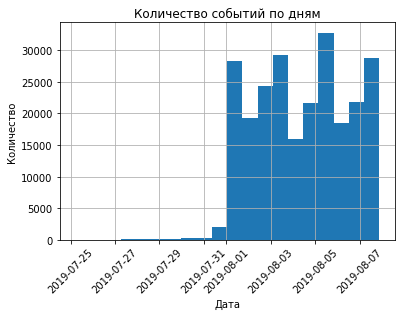

In [25]:
logs_exp['event_timestamp'].hist(bins=20)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('Количество событий по дням')
plt.show()

In [26]:
logs_exp['event_date'].value_counts()

2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
2019-07-31     2030
2019-07-30      412
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: event_date, dtype: int64

Логично предположить, что по количеству событий наиболее полные данные у нас 1 по 7 августа 2019г.

In [27]:
filtered = logs_exp.query("event_timestamp >= '2019-08-01'")
filtered

,event_name,device_id_hash,event_timestamp,exp_id,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Отлично, данные проанализированы корректно. </div>


In [28]:
num_users_filtered = filtered['device_id_hash'].unique().shape[0]
num_users_filtered

7534

In [29]:
num_users - num_users_filtered

17

In [30]:
num_users_filtered/num_users

0.9977486425638988

In [31]:
num_events_filtered = filtered.shape[0]
num_events_filtered

240887

In [32]:
num_events - num_events_filtered

2826

In [33]:
num_events_filtered/num_events

0.988404393692581

Отбросив старые данные мы потеряли лишь 17 пользователей, что составляет менее одной сотой доли и 2826, что менее двух сотых долей, событий учитывая отношение к общему количеству пользователей и событий, существенных искажений в данных быть не должно.

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием ревьюера:</b>

Напиши, пожалуйста, потери не только в абсолютных числах, но и в долях, как по количеству событий, так и по количеству уникальных пользователей.    
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера в2:</b> 

    
Здесь лучше анализировать не долю оставшихся данных, а долю потерянных

In [34]:
filtered.groupby('exp_id')['device_id_hash'].nunique()

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

После фильтрации у нас имеется достаточное количество пользователей всех трех групп.

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием ревьюера:</b>

Выше ты рассчитал не количество пользователей по группам, а количество событий.   
</div>


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 

    
Верно

<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b>

Тут можно добавить промежуточный вывод по проделанной работе, так проект будет выглядеть значительно лучше.   
</div>


Отфильтрованы лишние данные, посчитано их количство и соотношения для понимания критичности "потерь". Выяснено, что они не критичны.

In [35]:
filtered['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

В логах имеется 5 событий: чаще всего посещение главной страницы - 117328 раз, далее - экран предложений 46333 раза, посещение корзины - 42303 раз, страницы оплаты - 33918 и руководства - 1005 раз.

In [36]:
user_on_events = filtered.groupby('event_name')['device_id_hash'].nunique().reset_index().sort_values('device_id_hash', ascending=False)
user_on_events['share'] = user_on_events['device_id_hash']/filtered['device_id_hash'].nunique()
user_on_events

,event_name,device_id_hash,share
1,MainScreenAppear,7419,0.984736
2,OffersScreenAppear,4593,0.609636
0,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


Первым идет событие MainScreenAppear (отображение главного экрана), затем OffersScreenAppear (отображения предложений для пользователя), потом CartScreenAppear (отображение корзины) и наконец PaymentScreenSuccessful (отображение успешной оплаты). Событие Tutorial (руководство) не укладывается в данную цепочку, поэтому не будет рассмотрено в дальнейшем.

In [37]:
user_on_events = user_on_events[user_on_events.event_name != 'Tutorial']

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Доля пользователей, которые совершали каждое из этих событий посчитана правильно. 

Верно, что исключено событие Tutorial, его нельзя встроить в воронку. 👍
</div>


In [38]:
user_on_events_prev = user_on_events.loc[:, ('event_name', 'device_id_hash')]
user_on_events_prev['share_from_prev_step'] = user_on_events_prev.device_id_hash / user_on_events_prev.device_id_hash.shift(1)
user_on_events_prev

,event_name,device_id_hash,share_from_prev_step
1,MainScreenAppear,7419,NaN
2,OffersScreenAppear,4593,0.619086
0,CartScreenAppear,3734,0.812976
3,PaymentScreenSuccessful,3539,0.947777


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Доля пользователей, которые проходят на следующий шаг воронки посчитана правильно.


По рассчитанным долям пользователей на данном шаге по отношению к предыдущему шагу можно сделать вывод, что большая часть пользователей "теряется" при переходес шага MainScreenAppear (отображение главного экрана) на шаг OffersScreenAppear (отображения предложений для пользователя).

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>

Добавь, пожалуйста, расчет доли пользователей от первого шага до оплаты.

In [39]:
# Доля пользователей, дошедших до успешной оплаты, от пользователей, зашедших на главный экран.
user_on_events_prev.loc[3, 'device_id_hash'] / user_on_events_prev.loc[1, 'device_id_hash']

0.47701846610055265

Доля пользователей, дошедших до успешной оплаты, от пользователей, зашедших на главный экран равна 0.48

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлен расчет доли пользователей от первого шага до оплаты.</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 

    
Верно

In [40]:
filtered = filtered[filtered.event_name != 'Tutorial']
filtered.exp_id.value_counts()

248    84213
246    78985
247    76684
Name: exp_id, dtype: int64

В экспериментальной группе 84213 человека, в контрольных - 78985 и 76684

In [41]:
# Объединенная контрольная группа
groupA = filtered[filtered.exp_id.isin([246, 247])].groupby('event_name')['device_id_hash'].nunique().reset_index()
groupA['share'] = groupA['device_id_hash']/groupA['device_id_hash'].sum()
# Первая контрольная группа
groupA1 = filtered[filtered.exp_id == 246].groupby('event_name')['device_id_hash'].nunique().reset_index()
groupA1['share'] = groupA1['device_id_hash']/groupA1['device_id_hash'].sum()
# Вторая контрольная группа
groupA2 = filtered[filtered.exp_id == 247].groupby('event_name')['device_id_hash'].nunique().reset_index()
groupA2['share'] = groupA2['device_id_hash']/groupA2['device_id_hash'].sum()
# Группа с измененным шрифтом (Группа В)
groupB = filtered[filtered.exp_id == 248].groupby('event_name')['device_id_hash'].nunique().reset_index()
groupB['share'] = groupB['device_id_hash']/groupB['device_id_hash'].sum()
groupA1

,event_name,device_id_hash,share
0,CartScreenAppear,1266,0.196036
1,MainScreenAppear,2450,0.379374
2,OffersScreenAppear,1542,0.238774
3,PaymentScreenSuccessful,1200,0.185816


Гипотезы:

H0: Частота событий не зависит от номера контрольной группы.

H1: Частота событий зависит от номера контрольной группы.

In [42]:
import scipy.stats as sts

stat, p, _, _ = sts.chi2_contingency([groupA1.device_id_hash.values, groupA2.device_id_hash.values])
stat, p

(1.017526802722156, 0.7970110913690139)

P-value больше 0.05, следовательно распределение пользователей по событиям не зависит от контрольной группы, значит статистической разницы между контрольными группами на уровне значимости 5% нет.


<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>

Перед проверкой гипотез важно формулировать нулевую и альтернативную гипотезы. Чтобы сторонний человек понимал, что проверяется.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлены формулировки гипотез. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 

    
Верно

Гипотезы:

H0: Частота события {название_события} в контрольной группе 1 равна частоте события {название_события} в контрольной группе 2.

H1: Частота события {название_события} в контрольной группе 1 не равна частоте события {название_события} в контрольной группе 2.

In [43]:
from statsmodels.stats.proportion import proportions_ztest 

def event_stat_check(sample1, sample2, event):
    m1 =  sample1[sample1.event_name == event]['device_id_hash'].values[0]
    m2 = sample2[sample2.event_name == event]['device_id_hash'].values[0]
    n1 = sample1['device_id_hash'].sum()
    n2 = sample2['device_id_hash'].sum()
    stat, p = proportions_ztest([m1,m2], [n1, n2], value=0)
    print(f'Для события {event} z-статистика равна {stat}, p-value равно {p}')
    if p > 0.05:
        print('Отличие между группами статистически незначимо на уровне значимости 5%')
    else:
        print('Отличие между группами статистически значимо на уровне значимости 5%')
    print()
        
for event in groupA1.event_name.unique():
    event_stat_check(groupA1, groupA2, event)

Для события CartScreenAppear z-статистика равна 0.3371714139252246, p-value равно 0.7359876852552283
Отличие между группами статистически незначимо на уровне значимости 5%

Для события MainScreenAppear z-статистика равна -0.9308130579605144, p-value равно 0.3519502738749448
Отличие между группами статистически незначимо на уровне значимости 5%

Для события OffersScreenAppear z-статистика равна 0.12989209962968645, p-value равно 0.8966517949162408
Отличие между группами статистически незначимо на уровне значимости 5%

Для события PaymentScreenSuccessful z-статистика равна 0.6811860889243316, p-value равно 0.49575374918086756
Отличие между группами статистически незначимо на уровне значимости 5%



Для всех событий P-value больше 0.05, значит статистической разницы между контрольными группами на уровне значимости 5% нет и разбиение на группы корректно.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>

Согласен, разбиение по группам работает корректно.
</div>


Гипотезы:

H0: Частота события {название_события} в контрольной группе 1 равна частоте события {название_события} в группе В.

H1: Частота события {название_события} в контрольной группе 1 не равна частоте события {название_события} в группе В.

In [44]:
#Сравнение группы В с первой контрольной группой
for event in groupA1.event_name.unique():
    event_stat_check(groupA1, groupB, event)

Для события CartScreenAppear z-статистика равна 0.7031763756909407, p-value равно 0.4819458398461809
Отличие между группами статистически незначимо на уровне значимости 5%

Для события MainScreenAppear z-статистика равна -0.9385955726198251, p-value равно 0.3479384267818223
Отличие между группами статистически незначимо на уровне значимости 5%

Для события OffersScreenAppear z-статистика равна 0.11405779068660613, p-value равно 0.9091919819522383
Отличие между группами статистически незначимо на уровне значимости 5%

Для события PaymentScreenSuccessful z-статистика равна 0.33482738561689607, p-value равно 0.7377553009873645
Отличие между группами статистически незначимо на уровне значимости 5%



Гипотезы:

H0: Частота события {название_события} в контрольной группе 2 равна частоте события {название_события} в группе В.

H1: Частота события {название_события} в контрольной группе 2 не равна частоте события {название_события} в группе В.

In [45]:
#Сравнение группы В со второй контрольной группой
for event in groupA1.event_name.unique():
    event_stat_check(groupA2, groupB, event)

Для события CartScreenAppear z-статистика равна 0.3645138865180751, p-value равно 0.7154743061042802
Отличие между группами статистически незначимо на уровне значимости 5%

Для события MainScreenAppear z-статистика равна -0.0062059991785571944, p-value равно 0.9950483608560174
Отличие между группами статистически незначимо на уровне значимости 5%

Для события OffersScreenAppear z-статистика равна -0.016012119563074644, p-value равно 0.9872247229217913
Отличие между группами статистически незначимо на уровне значимости 5%

Для события PaymentScreenSuccessful z-статистика равна -0.3466354610337039, p-value равно 0.7288652017205819
Отличие между группами статистически незначимо на уровне значимости 5%



Гипотезы:

H0: Частота события {название_события} в объединенной контрольной группе равна частоте события {название_события} в группе В.

H1: Частота события {название_события} в объединенной контрольной группе не равна частоте события {название_события} в группе В.

In [46]:
#Сравнение группы В с объединенной контрольной группой

for event in groupA1.event_name.unique():
    event_stat_check(groupA, groupB, event)

Для события CartScreenAppear z-статистика равна 0.616739286631742, p-value равно 0.5374067036534838
Отличие между группами статистически незначимо на уровне значимости 5%

Для события MainScreenAppear z-статистика равна -0.547278644306319, p-value равно 0.584187313263467
Отличие между группами статистически незначимо на уровне значимости 5%

Для события OffersScreenAppear z-статистика равна 0.05692466532499962, p-value равно 0.95460520607885
Отличие между группами статистически незначимо на уровне значимости 5%

Для события PaymentScreenSuccessful z-статистика равна -0.004337050092179636, p-value равно 0.9965395455405514
Отличие между группами статистически незначимо на уровне значимости 5%



Для всех проведенных тестов p-value больше 0.05, что говорит нам о том, что изменение шрифта не привело к статистически значимым результатам на уровне значимости 5%.

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлена множественная проверка гипотез, получено новое p-value, но так как во всех тестах была принята нулевая гипотеза, то поправка на множественную проверку не имеет большого смысла, так как еще сильнее понижает уровень значимости. </div>

В ходе A/A/B-теста было проведено 17 экспериментов, которые показали, что изменение шрифта не привело к статистически значимым результатам на уровне значимости 5%. Применим поправку, полученную с помощью метода Ширака:

In [47]:
p1 = 1-(1-0.05)**(1/1)
p1

0.050000000000000044

На первом шаге новое значение уровня значимоти равно 0.05. Все гипотезы, которые мы проверяли выше, были приняты при p-value значительно больше 0.05 (минимальное равнялось 0.347), поэтому мы принимаем все нулевые гипотезы и завершаем процедуру Ширака. 

В ходе исследования было выявлено, что значительная часть пользователей «застревает» на предыдущих шагах и не доходит до покупки. Это может быть связано с неудобствами в использовании приложения или нечёткими инструкциями. Для улучшения конверсии необходимо проанализировать причины оттока пользователей и оптимизировать соответствующие этапы.

Таким образом, можно сделать вывод, что изменение шрифта не оказало значительного влияния на поведение пользователей и не является фактором, который может повлиять на решение о его изменении. Однако, для улучшения конверсии приложения необходимо проводить дополнительные исследования и анализировать другие факторы, которые могут влиять на поведение пользователей.

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b>

Скорректируй, пожалуйста, анализ проверки гипотез с учетом множественного теста, в выводе ты пишешь, что применил поправку Бонферонни, но в коде я ее не увидел. Советую не применять поправку Бонферрони, поскольку в таком случае ты сильно уменьшишь мощность теста. Далее в статье про множественные поправки гипотез приводится формула по которой можно расчитать уровень значимости с учетом поправки методом Шидака. 
    
https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">

Проделана хорошая работа. Код написан чисто, соблюдена структура проекта и написаны выводы. Есть несколько замечаний, исправь их и проект будет принят.

- по ссылкам ниже ты найдешь интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- проверь, пожалуйста, отсутствие пересечения пользователей    
- добавь, пожалуйста, расчет доли пользователей от первого шага до оплаты
- проанализируй и используй, пожалуйста, поправку на множественную проверку гипотез   
- добавь, пожалуйста, формулировку гипотез
</div>
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту в2

<div class="alert alert-success">

Отлично, замечания имправлены корректно, единственное хочу обратить внимание, что поправк расчитана не корректно, вместо 1 необходимо использовтаь общее число проверок - 17